<a href="https://colab.research.google.com/github/itsbasil/ML/blob/main/Pjt_telecom_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
df=pd.read_csv('/content/telecom_churn.csv')
df

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [112]:
df.isna().sum()

,0
Churn,0
AccountWeeks,0
ContractRenewal,0
DataPlan,0
DataUsage,0
CustServCalls,0
DayMins,0
DayCalls,0
MonthlyCharge,0
OverageFee,0


In [113]:
df.dtypes

,0
Churn,int64
AccountWeeks,int64
ContractRenewal,int64
DataPlan,int64
DataUsage,float64
CustServCalls,int64
DayMins,float64
DayCalls,int64
MonthlyCharge,float64
OverageFee,float64


In [114]:
df['Churn'].value_counts()

,count
Churn,
0,2850
1,483


<ipython-input-115-87221b80036c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Churn"], palette="pastel")


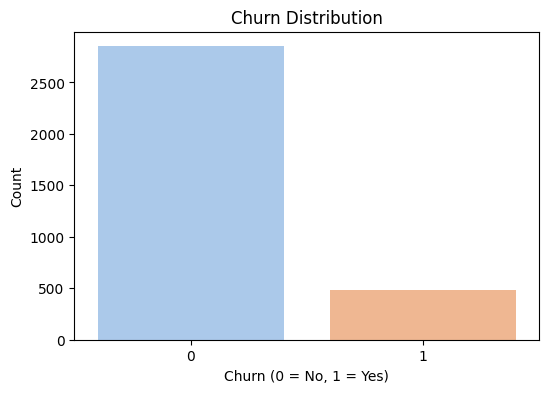

In [115]:
#Distribution of Churned vs Non-Churned Customers
#The dataset is imbalanced, with far more non-churned customers (0) than churned customers (1).
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Churn"], palette="pastel")
plt.title("Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


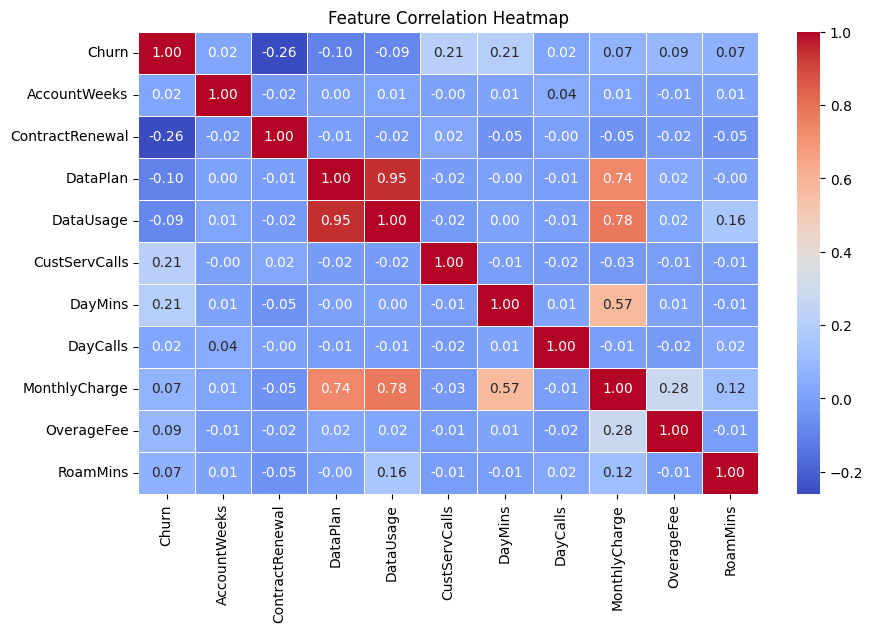

In [116]:
#Correlation Heatmap to understand feature relationships
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [117]:
#Positive correlation
#CustServCalls: More calls to customer service indicate dissatisfaction.
#OverageFee: High extra charges contribute to customer dissatisfaction.

#Negative coirrelation
#ContractRenewal: Customers who renew their contracts are less likely to churn.
#DataPlan: Having a data plan reduces the chance of churn, likely due to better customer retention.


In [118]:
#Feature Importance using Correlation
correlation = df.corr()["Churn"].sort_values(ascending=False)
correlation

,Churn
Churn,1.000000
CustServCalls,0.208750
DayMins,0.205151
OverageFee,0.092812
MonthlyCharge,0.072313
RoamMins,0.068239
DayCalls,0.018459
AccountWeeks,0.016541
DataUsage,-0.087195
DataPlan,-0.102148


In [119]:
X = df.drop(columns=["Churn"])
y = df["Churn"]

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [121]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [122]:
knn=KNeighborsClassifier()
svc=SVC()
nb=GaussianNB()
dtc=DecisionTreeClassifier()
rdf=RandomForestClassifier()
ada=AdaBoostClassifier()
gdb=GradientBoostingClassifier()
xgb=XGBClassifier()
models=[knn,svc,nb,dtc,ada,gdb,xgb,rdf]

In [123]:
acc0=[]
for model in models:
  model.fit(X_train,y_train)
  y_pred1=model.predict(X_test)
  print('\n\033[1;34m---------------------Model------------------\033[0m\n', model)
  print(classification_report(y_test,y_pred1,zero_division=0))
  acc0.append(accuracy_score(y_test,y_pred1))


---------------------Model------------------
 KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       566
           1       0.70      0.30      0.42       101

    accuracy                           0.87       667
   macro avg       0.79      0.64      0.67       667
weighted avg       0.86      0.87      0.85       667


---------------------Model------------------
 SVC()
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       566
           1       1.00      0.01      0.02       101

    accuracy                           0.85       667
   macro avg       0.92      0.50      0.47       667
weighted avg       0.87      0.85      0.78       667


---------------------Model------------------
 GaussianNB()
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       566
           1       0.46      0.36      0.40       101


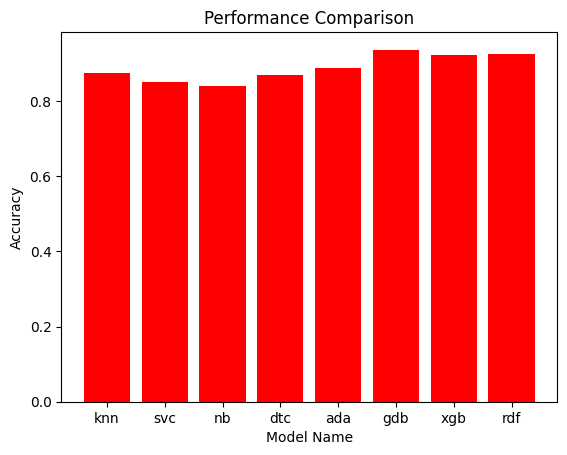

In [124]:
model_names=['knn','svc','nb','dtc','ada','gdb','xgb','rdf']
plt.bar(model_names,acc0,color='r')
plt.xlabel('Model Name')
plt.ylabel('Accuracy')
plt.title('Performance Comparison')
plt.show()

In [125]:
osl=SMOTE(random_state=1)
X_os,y_os=osl.fit_resample(X,y)
y_os.value_counts()

,count
Churn,
0,2850
1,2850


In [126]:
X_os_scaled=scaler.fit_transform(X_os)
X_os_train,X_os_test,y_os_train,y_os_test=train_test_split(X_os_scaled,y_os,random_state=2,test_size=0.3)
X_os_train.shape,y_os_train.shape

((3990, 10), (3990,))

In [127]:
acc=[]
for model in models:
  model.fit(X_os_train,y_os_train)
  y_pred2=model.predict(X_os_test)
  print('\n\033[1;34m---------------------Model------------------\033[0m\n', model)
  print(classification_report(y_os_test,y_pred2,zero_division=0))
  acc.append(accuracy_score(y_os_test,y_pred2))



---------------------Model------------------
 KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       857
           1       0.85      0.93      0.89       853

    accuracy                           0.88      1710
   macro avg       0.89      0.88      0.88      1710
weighted avg       0.89      0.88      0.88      1710


---------------------Model------------------
 SVC()
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       857
           1       0.88      0.88      0.88       853

    accuracy                           0.88      1710
   macro avg       0.88      0.88      0.88      1710
weighted avg       0.88      0.88      0.88      1710


---------------------Model------------------
 GaussianNB()
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       857
           1       0.83      0.83      0.83       853


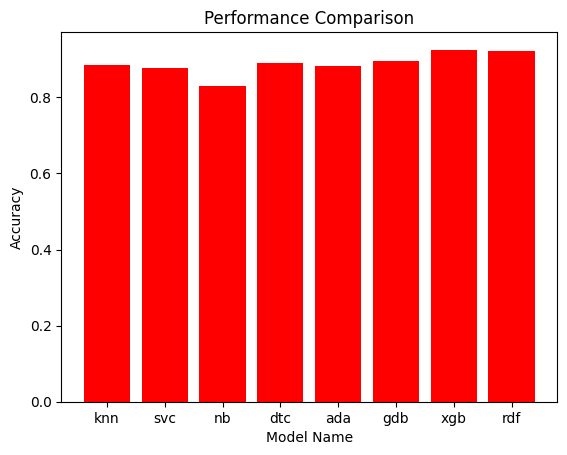

In [128]:
model_names=['knn','svc','nb','dtc','ada','gdb','xgb','rdf']
plt.bar(model_names,acc,color='r')
plt.xlabel('Model Name')
plt.ylabel('Accuracy')
plt.title('Performance Comparison')
plt.show()

In [129]:
usl=RandomUnderSampler(random_state=1)
X_us,y_us=usl.fit_resample(X,y)
y_us.value_counts()

,count
Churn,
0,483
1,483


In [130]:
X_us_scaled=scaler.fit_transform(X_us)
X_us_train,X_us_test,y_us_train,y_us_test=train_test_split(X_us_scaled,y_us,random_state=2,test_size=0.3)
X_us_train.shape,y_us_train.shape

((676, 10), (676,))

In [131]:
acc1=[]
for model in models:
  model.fit(X_us_train,y_us_train)
  y_pred3=model.predict(X_us_test)
  print('\n\033[1;34m---------------------Model------------------\033[0m\n', model)
  print(classification_report(y_us_test,y_pred3,zero_division=0))
  acc1.append(accuracy_score(y_us_test,y_pred3))


---------------------Model------------------
 KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       149
           1       0.85      0.79      0.82       141

    accuracy                           0.83       290
   macro avg       0.84      0.83      0.83       290
weighted avg       0.84      0.83      0.83       290


---------------------Model------------------
 SVC()
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       149
           1       0.86      0.84      0.85       141

    accuracy                           0.86       290
   macro avg       0.86      0.85      0.85       290
weighted avg       0.86      0.86      0.86       290


---------------------Model------------------
 GaussianNB()
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       149
           1       0.87      0.78      0.82       141


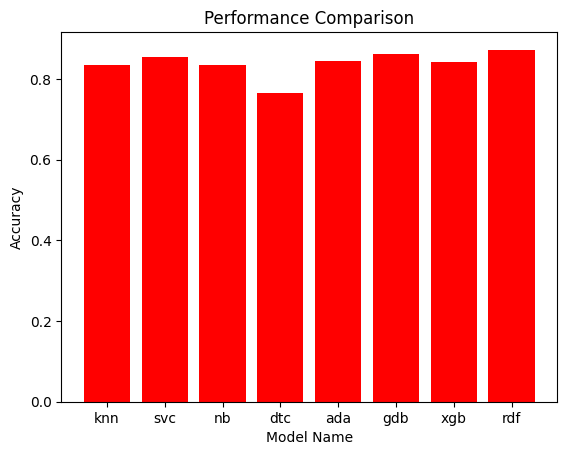

In [132]:
model_names=['knn','svc','nb','dtc','ada','gdb','xgb','rdf']
plt.bar(model_names,acc1,color='r')
plt.xlabel('Model Name')
plt.ylabel('Accuracy')
plt.title('Performance Comparison')
plt.show()

In [133]:
params= {
    "n_estimators": [50, 100, 200],  # Number of trees
    "learning_rate": [0.01, 0.05, 0.1],  # Step size
    "max_depth": [3, 5, 7]  # Depth of trees
}

In [134]:
clf=RandomizedSearchCV(gdb,params,cv=7,scoring='accuracy')
clf.fit(X_train,y_train)

RandomizedSearchCV(cv=7, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [50, 100, 200]},
                   scoring='accuracy')

In [135]:
clf.best_params_

{'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.05}

In [136]:
pred=clf.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       566
           1       0.88      0.50      0.63       101

    accuracy                           0.91       667
   macro avg       0.90      0.74      0.79       667
weighted avg       0.91      0.91      0.90       667



In [137]:
#GradientBoostingClassifier model without oversampling gives 94%


In [138]:
print('1. What variables are contributing to customer churn?')
#    Customers paying high overage fees are more likely to leave.
#    More customer service calls indicate dissatisfaction, leading to higher churn.
#    Identify customers making frequent support calls and offer proactive solutions.'

1. What variables are contributing to customer churn?


In [139]:
print('# 2. Who are the customers more likely to churn?')
#    high CustServCalls
#    high OverageFee
#    high MonthlyCharge


# 2. Who are the customers more likely to churn?


In [140]:
print('# 3. What actions can be taken to stop them from leaving?')

#    Reduce response time and improve issue resolution quality.
#    Offer customized discounts or bundled plans for high-usage customers.
#    Identify customers making frequent support calls and offer proactive solutions.


# 3. What actions can be taken to stop them from leaving?
